<a href="https://colab.research.google.com/github/ask350/Deep-Learning/blob/main/Regression_PE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression - Deep Learning

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 - Reading the dataset

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1. AT - Atmospheric Temperature
2. V - Vaccum Pressure
3. AP - Atmospheric Pressure
4. RH - Relative Humidity
5. PE - Powerplant output in MW (Taget)

### Step 2 - Perform basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()

41

In [ ]:
### Remove duplicate values
df= df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step 3 - Seperate X and Y(PE)

In [62]:
X =df.drop(columns=["PE"])
Y = df[["PE"]]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [63]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4 - Apply preprocessing on X

In [ ]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe =  make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Apply train test split

In [65]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [66]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [67]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [68]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [69]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

### Step 6 - Training the neural network

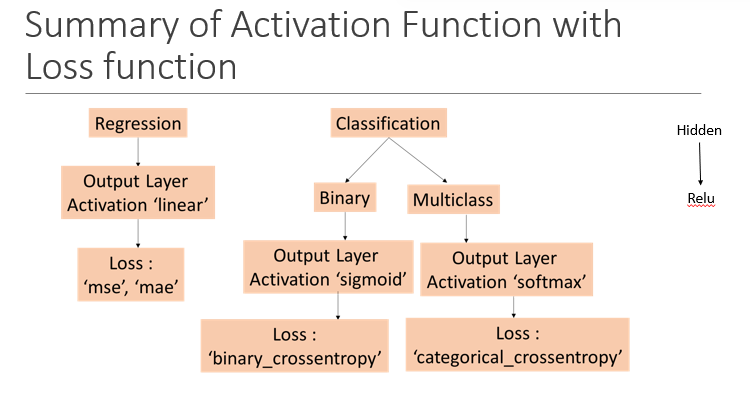

In [70]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [71]:
# Initialize the neural network
model = Sequential()

# Create an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create a hidden layer 1
model.add(Dense(units=8, activation="relu"))

# Create a hidden layer 2
model.add(Dense(units=4, activation="relu"))

# Create a output layer
model.add(Dense(units=1, activation="linear"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [74]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 206663.3281 - mae: 454.2837 - val_loss: 204784.3750 - val_mae: 452.2056
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 204500.9219 - mae: 451.9041 - val_loss: 198256.3750 - val_mae: 445.0034
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195789.9375 - mae: 442.2432 - val_loss: 179627.6719 - val_mae: 423.6948
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 173056.5000 - mae: 415.6761 - val_loss: 148362.8750 - val_mae: 383.9301
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138558.6406 - mae: 369.8077 - val_loss: 112018.1484 - val_mae: 327.5640
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102978.4688 - mae: 310.7827 - val_loss: 81231.8047 - val_mae: 264.8468
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73362.3281 - mae: 248.4383 - val_loss: 59951.8945 - val_mae: 219.2763
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54875.4727 - mae: 2

In [75]:
hist.history["loss"]

[206524.140625,
 203266.5,
 191003.546875,
 165255.34375,
 129833.765625,
 94837.53125,
 68711.53125,
 50898.8203125,
 36893.58984375,
 25139.474609375,
 16282.4951171875,
 10668.107421875,
 7564.20849609375,
 5823.1318359375,
 4695.6005859375,
 3834.181640625,
 3144.287109375,
 2586.8291015625,
 2143.326416015625,
 1792.93896484375,
 1518.2730712890625,
 1301.162109375,
 1124.9908447265625,
 979.7821655273438,
 857.0653686523438,
 750.892333984375,
 658.9190063476562,
 578.1976318359375,
 506.53887939453125,
 443.35791015625,
 386.2863464355469,
 336.6868896484375,
 291.80804443359375,
 252.71542358398438,
 217.99208068847656,
 188.2737274169922,
 161.1612091064453,
 137.71336364746094,
 117.5045394897461,
 100.66639709472656,
 85.56493377685547,
 72.2206802368164,
 60.97049331665039,
 51.92554473876953,
 44.83407211303711,
 39.37330627441406,
 35.0410270690918,
 31.660663604736328,
 29.251575469970703,
 27.355857849121094,
 25.91939353942871,
 24.92447853088379,
 24.208181381225586,


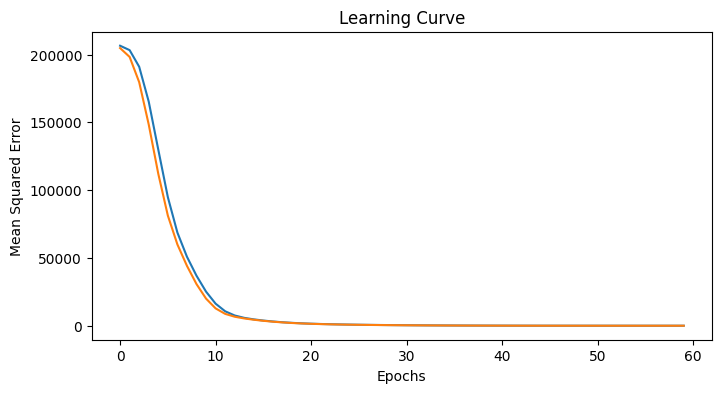

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

### Model evaluation

In [78]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6856 - mae: 3.7107


[21.712940216064453, 3.687706232070923]

In [79]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.2930 - mae: 3.6865


[22.23187828063965, 3.757465362548828]

In [80]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [81]:
ypred_test[0:5]

array([[427.7731 ],
       [481.02917],
       [482.62823],
       [450.56052],
       [449.94843]], dtype=float32)

In [82]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [83]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9244570732116699

### Above has r2 score of 0.92 > 0.8 hence it is good model

### Out of Sample prediction

In [84]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [85]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [86]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [87]:
pred = model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[445.6104 ],
       [440.1325 ],
       [430.95282],
       [440.47247],
       [473.4796 ]], dtype=float32)

In [88]:
xnew["PE_pred"] = pred

In [89]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.610413
1,28.88,54.89,1007.16,46.60,440.132507
2,27.89,73.21,1001.32,85.88,430.952820
3,25.69,62.26,1011.38,74.08,440.472473
4,12.16,40.81,1025.79,70.97,473.479614
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.847046
96,11.78,39.96,1011.37,82.95,471.437744
97,5.62,41.38,1020.91,86.21,483.277985
98,24.96,74.99,1008.25,80.52,437.613831


In [90]:
xnew.to_csv("Result.csv", index=False)

### Savingthe model object

In [93]:
model.save("powerplant.keras")

### Load the model

In [94]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)